# Logistics Regression
## Data Preparation
## Visualisation
## Create Train & Test Set
## Create a Logistics Regression Model
## Predictions
## Decision Boundary
## How to use sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data-Generate using numpy
mean_01=np.array([1,.05])
cov_01=np.array([[1,0.1],[0.1,1.2]])
mean_02=np.array([4,5])
cov_02=np.array([[1.2,0.1],[0.1,1.3]])

dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

In [3]:
dist_01

array([[ 1.57847165e+00,  6.14198661e-01],
       [ 1.13948972e+00, -1.91490497e-01],
       [ 6.55809457e-01, -7.92436876e-01],
       [ 1.93913334e+00, -2.87286353e-01],
       [ 4.95766630e-01,  9.98817774e-01],
       [ 1.83199240e-01, -1.39933014e+00],
       [-3.01198278e-01, -1.82884829e-02],
       [ 3.59841778e-02,  7.94984945e-01],
       [ 2.66281170e-01,  1.17766636e+00],
       [ 1.66259209e+00, -4.40432618e-01],
       [-1.58602311e-01, -7.24260013e-01],
       [ 1.09076247e+00,  2.41204348e-01],
       [ 1.19839137e+00, -8.11284318e-01],
       [ 2.12639819e+00, -1.58280775e+00],
       [ 2.71896795e+00,  7.08351569e-01],
       [ 1.97650991e+00,  2.46450254e+00],
       [ 2.05442161e-01,  1.13560881e+00],
       [ 8.00641552e-01,  1.96738416e+00],
       [ 1.62044415e+00, -3.02354376e-01],
       [ 3.21678207e+00, -1.27772594e+00],
       [ 2.54463187e+00,  4.15242103e-01],
       [ 1.32559843e+00,  3.94670991e-01],
       [ 2.33803423e+00, -3.30621646e-01],
       [ 1.

In [4]:
dist_02

array([[4.43577556, 5.55400661],
       [5.42304459, 6.12485011],
       [5.73089363, 5.21422102],
       [3.45803903, 4.76969083],
       [3.66479442, 3.13542715],
       [4.33339672, 4.60969187],
       [4.18138733, 5.69575779],
       [5.59824299, 5.62472562],
       [3.90566789, 5.14016444],
       [3.97263752, 3.39237542],
       [4.54735285, 5.32680954],
       [5.44509521, 4.42296088],
       [5.60968544, 3.13005348],
       [5.23097688, 4.34607973],
       [4.05382398, 6.13254261],
       [2.68835505, 5.73226888],
       [3.97592725, 4.38588659],
       [5.85707786, 4.61837051],
       [2.46188292, 5.56799742],
       [3.74599611, 3.27927447],
       [4.94565664, 4.37158733],
       [3.61743226, 5.00260999],
       [4.66621238, 4.70621258],
       [5.23225255, 5.07444437],
       [5.90595183, 6.13454944],
       [3.31056911, 6.17109431],
       [4.53035988, 4.47114153],
       [3.42098304, 5.37764545],
       [4.76610673, 4.35832468],
       [4.51615261, 5.52106309],
       [2.

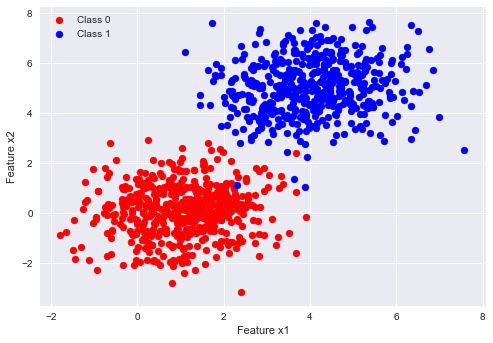

In [5]:
plt.style.use("seaborn")
plt.scatter(dist_01[:,0],dist_01[:,1],color='red',label="Class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color='blue',label="Class 1")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()

In [6]:
data=np.zeros((1000,3))

In [7]:
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[500:,-1]=1.0

In [8]:
# Randomly shuffle data
np.random.shuffle(data)

In [9]:
data[:10]

array([[ 3.33247157,  4.63865104,  1.        ],
       [ 1.22340642,  1.06098555,  0.        ],
       [ 3.42326811,  4.84302042,  1.        ],
       [ 5.13064709,  5.21187548,  1.        ],
       [ 1.22388561,  0.55321807,  0.        ],
       [ 2.49437339,  5.4175231 ,  1.        ],
       [ 5.54271215,  6.19440397,  1.        ],
       [ 0.44205077,  0.51199141,  0.        ],
       [ 0.27277269, -1.19528343,  0.        ],
       [ 5.06199994,  4.19415665,  1.        ]])

In [10]:
# divide the data into train and test
split=int(0.8*data.shape[0])
X_train=data[:split,:-1]
X_test=data[split:,:-1]
Y_train=data[:split,-1]
Y_test=data[split:,-1]

In [11]:
X_train.shape

(800, 2)

In [12]:
X_test.shape

(200, 2)

In [13]:
Y_train.shape

(800,)

In [14]:
Y_test.shape

(200,)

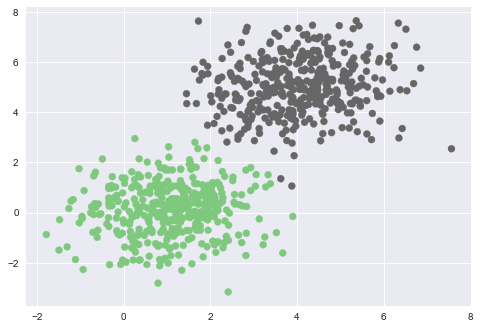

In [15]:
# plot the training data and normalisation
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [16]:
# Data Normalisation
x_mean=X_train.mean(axis=0)
x_mean

array([2.56504041, 2.59040857])

In [17]:
x_std=X_train.std(axis=0)
x_std

array([1.81344471, 2.69453021])

In [18]:
# Apply the transformation
X_train=(X_train-x_mean)/x_std

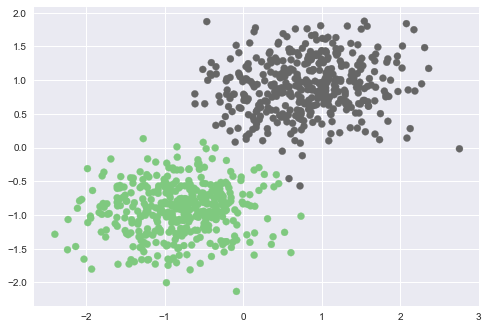

In [19]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [20]:
X_test=(X_test-x_mean)/x_std

# Logistics Implementation

In [21]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [22]:
def hypothesis(X,theta):
    ''' 
    X-entire array(m,n+1)
    theta-np.array(n+1,1)
    '''
    return sigmoid(np.dot(X,theta))
def error(X,y,theta):
    '''
    param:
    X-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    return 
    scale_value=loss
    '''
    hi=hypothesis(X,theta)
    error=-1*np.mean((y*np.log(hi)+((1-y)*np.log(1-hi))))
    return error

In [23]:
a=np.linspace(-10,10,20)

In [24]:
a

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

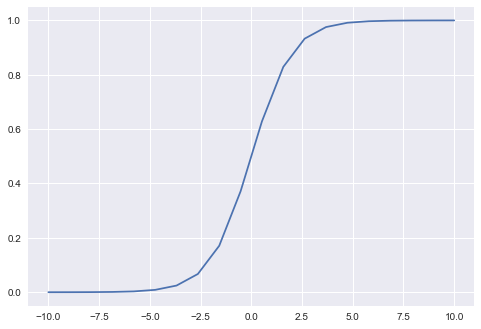

In [25]:
plt.plot(a,sigmoid(a))

In [26]:
# gradient descent optimisation
def gradient(X,y,theta):
    '''
     param:
    X-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    return:
        gradient_vector=(n+1,1)
    
    '''
    hi=hypothesis(X,theta)
    grad=-np.dot(X.T,(y-hi))
    m=X.shape[0]
    return grad/m

def gradient_descent(X,y,lr=0.1,max_iter=500):
    n=X.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    for i in range(max_iter):
        err=error(X,y,theta)
        error_list.append(err)
        grad=gradient(X,y,theta)
        # update
        theta=theta-lr*grad
    return (theta,error_list)
    

In [27]:
ones=np.ones((X_train.shape[0],1))
X_New_train=np.hstack((ones,X_train))
print(X_New_train.shape)
print(X_New_train)
Y_train=Y_train.reshape((-1,1))

(800, 3)
[[ 1.          0.42318972  0.76014827]
 [ 1.         -0.73982624 -0.56760285]
 [ 1.          0.47325827  0.83599428]
 ...
 [ 1.         -0.93526624 -0.99389774]
 [ 1.         -1.29821419 -1.38075748]
 [ 1.          0.80907992  0.93738248]]


In [28]:
theta,error=gradient_descent(X_New_train,Y_train)

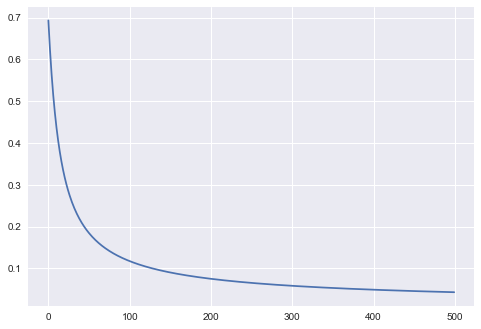

In [29]:
plt.plot(error)

In [30]:
theta

array([[0.11795326],
       [2.07541166],
       [2.989319  ]])

# Visualise Decision Surface

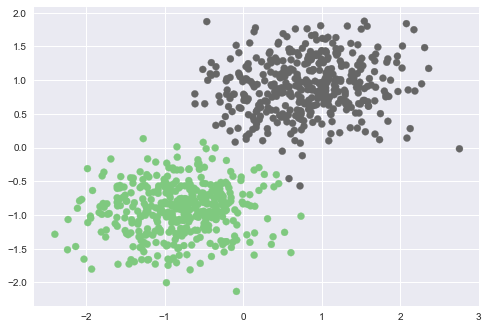

In [31]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.show()

In [32]:
x1=np.arange(-3,4)

In [33]:
x2=-(theta[0]+theta[1]*x1)/theta[2]

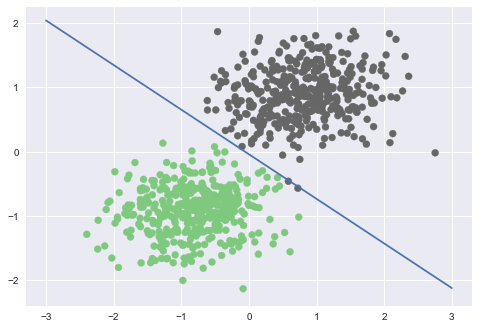

In [35]:
plt.plot(x1,x2)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1)),cmap=plt.cm.Accent)
plt.show()

In [39]:
def predict(X,theta):
    h=hypothesis(X,theta)
    output=np.zeros(h.shape)
    output[h>=0.5]=1
#     print(output[:5,:])
    return output.astype('int')
predict(X_New_train,theta)
    

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [40]:
# Prediction and accuracy
X_New_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))


In [41]:
X_pred=predict(X_New_train,theta)
Y_pred=predict(X_New_test,theta)

In [45]:
def accuracy(actual,pred):
    actual=actual.astype('int')
    acc=np.sum(actual==pred)/actual.shape[0]
    return acc
    

In [46]:
accuracy(Y_train,X_pred)

0.9975

# Logistics Regression using sklearn

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model=LogisticRegression()

In [49]:
model.fit(X_train,Y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
theta_0=model.intercept_

In [51]:
theta_s=model.coef_

In [52]:
model.score(X_train,Y_train)

0.9975

In [53]:
y_pred=model.predict(X_test)

In [54]:
y_pred

array([1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.])